# Feature Selection

### Importing Libraries

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import _pickle as pickle
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

### Loading the Data

In [215]:
with open('clean_df.pkl', 'rb') as fp:
    df = pickle.load(fp)

### Dropping Columns
That we already have one-hot encoded

In [216]:
# Dropping Species, Month, and Lat&Long columns
df.drop(['Species', 'Month', 'Lat&Long'], axis=1, inplace=True)

# Also dropping Trap because it is a derivative of location which is already covered in the latitude and longitude.
df.drop('Trap', axis=1, inplace=True)

# Also need to drop the NumMosquitos because testing does not have that data
df.drop('NumMosquitos', axis=1, inplace=True)

In [217]:
# Checking for NaN values
df.isnull().sum()

WnvPresent                  0
Tmax                        0
Tmin                        0
Tavg                        0
Depart                      0
DewPoint                    0
WetBulb                     0
Heat                        0
Cool                        0
Depth                       0
SnowFall                  178
PrecipTotal               233
StnPressure                 0
SeaLevel                    0
ResultSpeed                 0
ResultDir                   0
AvgSpeed                    0
Daylight                    0
CULEX ERRATICUS             0
CULEX PIPIENS               0
CULEX PIPIENS/RESTUANS      0
CULEX RESTUANS              0
CULEX SALINARIUS            0
CULEX TARSALIS              0
CULEX TERRITANS             0
41.6-87.6                   0
41.7-87.5                   0
41.7-87.6                   0
41.7-87.7                   0
41.8-87.6                   0
41.8-87.7                   0
41.8-87.8                   0
41.9-87.6                   0
41.9-87.7 

In [218]:
# Dropping the columns with NaN
df.dropna(axis=1, inplace=True)

In [219]:
# Checking again for null
df.isnull().sum()

WnvPresent                0
Tmax                      0
Tmin                      0
Tavg                      0
Depart                    0
DewPoint                  0
WetBulb                   0
Heat                      0
Cool                      0
Depth                     0
StnPressure               0
SeaLevel                  0
ResultSpeed               0
ResultDir                 0
AvgSpeed                  0
Daylight                  0
CULEX ERRATICUS           0
CULEX PIPIENS             0
CULEX PIPIENS/RESTUANS    0
CULEX RESTUANS            0
CULEX SALINARIUS          0
CULEX TARSALIS            0
CULEX TERRITANS           0
41.6-87.6                 0
41.7-87.5                 0
41.7-87.6                 0
41.7-87.7                 0
41.8-87.6                 0
41.8-87.7                 0
41.8-87.8                 0
41.9-87.6                 0
41.9-87.7                 0
41.9-87.8                 0
42.0-87.7                 0
42.0-87.8                 0
42.0-87.9           

## Assigning Variables

In [220]:
X = df.drop('WnvPresent', axis=1).astype(float)

y = df['WnvPresent']

## Using Variance Threshold
Removing Features with Low Variance

In [221]:
# Total Number of Columns
len(df.columns)

42

In [222]:
# Instantiating the selector
selector = VarianceThreshold(.01)

# Fitting the selector
selector.fit(X)

# Getting the columns that remain
sel_feats = selector.get_support(indices=True)

In [223]:
print('Removed columns/features:', list(X.columns ^ X.columns[sel_feats]))
print('How many columns/features that were removed: ', len(X.columns) - len(X.columns[sel_feats]))

Removed columns/features: ['41.6-87.6', 'CULEX ERRATICUS', 'CULEX SALINARIUS', 'CULEX TARSALIS', 'Depth', 'May']
How many columns/features that were removed:  6


In [224]:
# Reassigning the variable
X = X[X.columns[sel_feats]]

## Scaling the Data

In [225]:
# Separating the DF for scaling purposes
con_var = X.loc[:, :'Daylight']
cat_var = X.loc[:, 'CULEX PIPIENS':]

# Scaling
scaler = MinMaxScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(con_var), 
                         index=con_var.index, 
                         columns=con_var.columns)

# Rejoining the two separated DFs
X = scaled_df.join(cat_var)
X

,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Daylight,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX TERRITANS,41.7-87.5,41.7-87.6,41.7-87.7,41.8-87.6,41.8-87.7,41.8-87.8,41.9-87.6,41.9-87.7,41.9-87.8,42.0-87.7,42.0-87.8,42.0-87.9,Aug,July,June,Oct,Sept
0,0.782051,0.571429,0.710145,0.733333,0.573529,0.637931,0.000000,0.512195,0.707143,0.687075,0.361111,0.457143,0.343396,0.948718,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.782051,0.571429,0.710145,0.733333,0.573529,0.637931,0.000000,0.512195,0.707143,0.687075,0.361111,0.457143,0.343396,0.948718,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.782051,0.571429,0.710145,0.733333,0.573529,0.637931,0.000000,0.512195,0.707143,0.687075,0.361111,0.457143,0.343396,0.948718,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.782051,0.571429,0.710145,0.733333,0.573529,0.637931,0.000000,0.512195,0.707143,0.687075,0.361111,0.457143,0.343396,0.948718,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.782051,0.571429,0.710145,0.733333,0.573529,0.637931,0.000000,0.512195,0.707143,0.687075,0.361111,0.457143,0.343396,0.948718,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.782051,0.571429,0.710145,0.733333,0.573529,0.637931,0.000000,0.512195,0.707143,0.687075,0.361111,0.457143,0.343396,0.948718,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.782051,0.571429,0.710145,0.733333,0.573529,0.637931,0.000000,0.512195,0.707143,0.687075,0.361111,0.457143,0.343396,0.948718,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.782051,0.571429,0.710145,0.733333,0.573529,0.637931,0.000000,0.512195,0.707143,0.687075,0.361111,0.457143,0.343396,0.948718,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.782051,0.571429,0.710145,0.733333,0.573529,0.637931,0.000000,0.512195,0.707143,0.687075,0.361111,0.457143,0.343396,0.948718,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.782051,0.571429,0.710145,0.733333,0.573529,0.637931,0.000000,0.512195,0.707143,0.687075,0.361111,0.457143,0.343396,0.948718,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Exporting the Variance Threshold DF

In [226]:
var_df = X.join(y)

In [227]:
with open("var_df.pkl", "wb") as fp:
    pickle.dump(var_df, fp)

## Using Feature Importances
From a tree classifier

In [228]:
from sklearn.ensemble import ExtraTreesClassifier

In [229]:
# Instantiating the classifier
forest = ExtraTreesClassifier(n_estimators=200)

# Fitting the classifier
forest.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [230]:
# Determining the important features
importances = forest.feature_importances_

# The standard deviation among the trees for the important features
std = np.std([i.feature_importances_ for i in forest.estimators_], axis=0)

# Indexing and sorting the important features
indices = np.argsort(importances)[::-1]

### Plotting the Most important features

Feature Rankings:
1. Daylight: 0.0570846065418766
2. 42.0-87.9: 0.05625643276994854
3. 42.0-87.8: 0.05335366148170837
4. Aug: 0.050849930471272564
5. CULEX PIPIENS/RESTUANS: 0.04752143583426803
6. CULEX PIPIENS: 0.044673653947584394
7. 41.9-87.8: 0.038324245545594694
8. 41.7-87.6: 0.03244811609888283
9. CULEX RESTUANS: 0.03178466527694769
10. 41.8-87.8: 0.030362775610047233
11. 41.9-87.7: 0.02974359557631613
12. Cool: 0.02887139711300379
13. 42.0-87.7: 0.028512354589482404
14. Tmin: 0.028424597390326233
15. DewPoint: 0.02809501545417823
16. ResultDir: 0.02807277279190447
17. 41.7-87.5: 0.027452315662051276
18. Tmax: 0.02739574193454475
19. 41.7-87.7: 0.027308886900257387
20. WetBulb: 0.027149537110185026


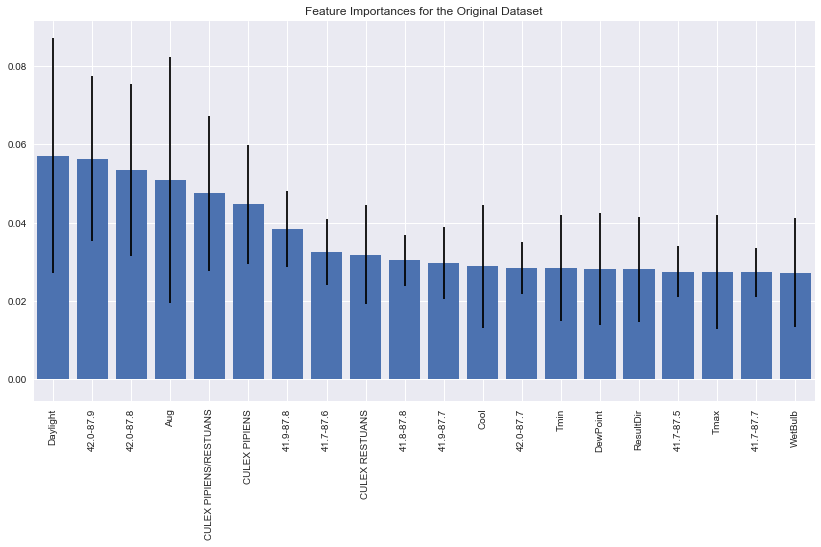

In [231]:
plt.style.use('seaborn')

print("Feature Rankings:")

# Showing the top 20 features
for i in range(20):
    print(f"{i+1}. {X.columns[indices[i]]}: {importances[indices[i]]}")
    
# Plotting the top 10 features
plt.figure(figsize=(14,7))

plt.title("Feature Importances for the Original Dataset")
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align='center')

plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-.5, 19.5])
plt.show()

## Constructing the Final DF
With the top 20 features

In [232]:
final_df = X[X.columns[indices][:20]].join(y)
final_df.head(5)

,Daylight,42.0-87.9,42.0-87.8,Aug,CULEX PIPIENS/RESTUANS,CULEX PIPIENS,41.9-87.8,41.7-87.6,CULEX RESTUANS,41.8-87.8,41.9-87.7,Cool,42.0-87.7,Tmin,DewPoint,ResultDir,41.7-87.5,Tmax,41.7-87.7,WetBulb,WnvPresent
0,0.948718,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.512195,0.0,0.571429,0.573529,0.457143,0.0,0.782051,0.0,0.637931,0
1,0.948718,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.512195,0.0,0.571429,0.573529,0.457143,0.0,0.782051,0.0,0.637931,0
2,0.948718,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.512195,0.0,0.571429,0.573529,0.457143,0.0,0.782051,0.0,0.637931,0
3,0.948718,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.512195,0.0,0.571429,0.573529,0.457143,0.0,0.782051,0.0,0.637931,0
4,0.948718,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.512195,0.0,0.571429,0.573529,0.457143,0.0,0.782051,0.0,0.637931,0


### Exporting the Final DF

In [233]:
with open("top_df.pkl", "wb") as fp:
    pickle.dump(final_df, fp)